In [57]:
import pandas as pd
import random
from matplotlib import pyplot as plt
import os
from PIL import Image
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import joblib

In [10]:
df = pd.read_csv('../HandInfo.csv', index_col=0, sep=',')

In [11]:
df.loc[(df['aspectOfHand'] == 'palmar left') | (df['aspectOfHand'] == 'palmar right')]

,age,gender,skinColor,accessories,nailPolish,aspectOfHand,imageName,irregularities
id,,,,,,,,
0,27,male,fair,1,0,palmar left,Hand_0000038.jpg,0
0,27,male,fair,1,0,palmar left,Hand_0000039.jpg,0
0,27,male,fair,1,0,palmar left,Hand_0000040.jpg,0
0,27,male,fair,1,0,palmar left,Hand_0000041.jpg,0
0,27,male,fair,1,0,palmar left,Hand_0000042.jpg,0
...,...,...,...,...,...,...,...,...
1589,22,female,fair,0,0,palmar left,Hand_0011740.jpg,0
1589,22,female,fair,0,0,palmar left,Hand_0011741.jpg,0
1589,22,female,fair,0,0,palmar left,Hand_0011742.jpg,0


In [12]:
df['aspectOfHand'].unique()

array(['dorsal right', 'dorsal left', 'palmar left', 'palmar right'],
      dtype=object)

In [13]:
df['aspectOfHand'].value_counts()

aspectOfHand
dorsal right    2892
palmar right    2813
dorsal left     2788
palmar left     2583
Name: count, dtype: int64

In [23]:
df['label'] = LabelEncoder().fit_transform(df['aspectOfHand'])

In [37]:
df[['label', 'aspectOfHand']]

,label,aspectOfHand
id,,
0,1,dorsal right
0,1,dorsal right
0,1,dorsal right
0,1,dorsal right
0,1,dorsal right
...,...,...
1589,2,palmar left
1589,2,palmar left
1589,2,palmar left


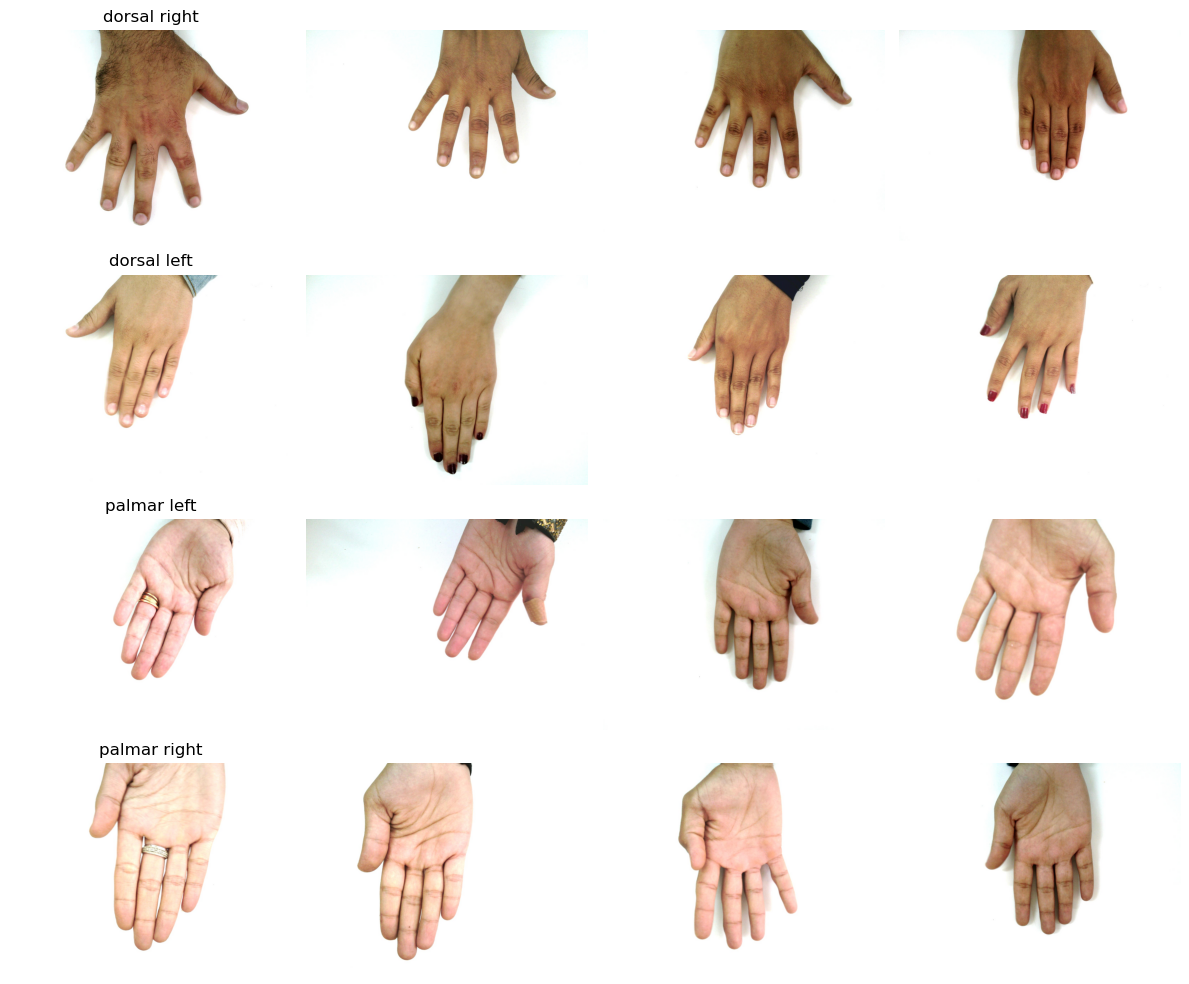

In [14]:
classes = df['aspectOfHand'].unique()

fig, axes = plt.subplots(len(classes), 4, figsize=(12, 10))

for row_idx, cls in enumerate(classes):
    samples = df[df['aspectOfHand'] == cls].sample(4, random_state=42)

    for col_idx, (_, row) in enumerate(samples.iterrows()):
        img = Image.open(os.path.join("../data/Hands", row['imageName']))
        axes[row_idx, col_idx].imshow(img)
        axes[row_idx, col_idx].axis("off")
        axes[row_idx, col_idx].set_title(cls if col_idx == 0 else "")

plt.tight_layout()
plt.show()

In [28]:
def load_and_preprocess_image(img_path):
    img = Image.open(img_path).convert("L")
    img = img.resize((64, 64))
    img_array = np.array(img)
    return img_array

In [29]:
X = []
y = []

for _, row in df.iterrows():
    img_path = os.path.join("../data/Hands", row["imageName"])
    
    img_array = load_and_preprocess_image(img_path)
    flat = img_array.flatten()
    
    X.append(flat)
    y.append(row["label"])

In [30]:
X = np.array(X) / 255.0
y = np.array(y)

In [33]:
print(X.shape, y.shape)

(11076, 4096) (11076,)


In [34]:
np.unique(y)

array([0, 1, 2, 3])

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.9519682195738534

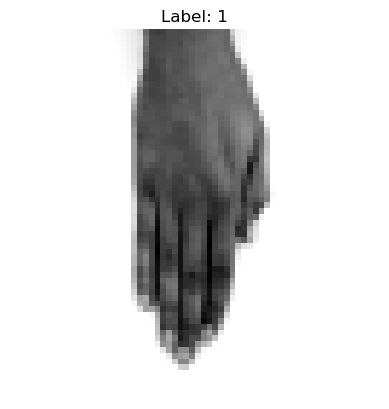

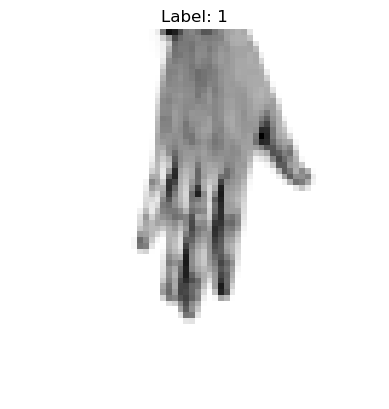

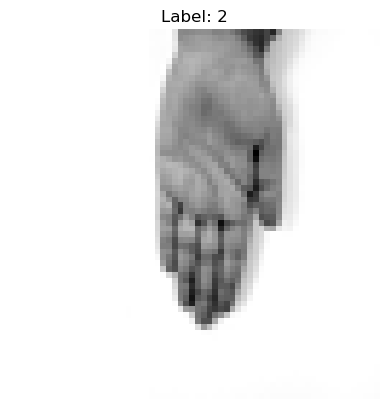

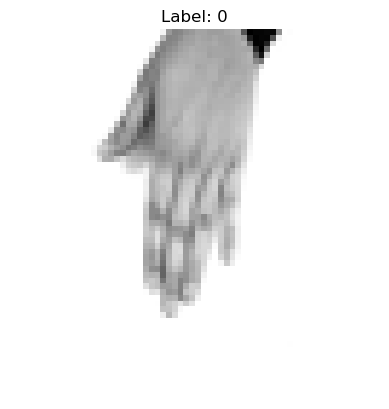

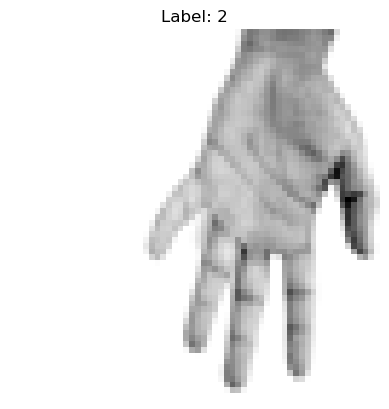

In [51]:
val_indices = random.sample(range(len(X_test)), 5)

for idx in val_indices:
    plt.imshow(X_test[idx].reshape(64, 64), cmap="gray")
    plt.title(f"Label: {y_test[idx]}")
    plt.axis("off")
    plt.show()